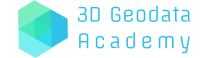

Created by Florent Poux. Licence MIT.
Members of the [3D Geodata Academy](https://learngeodata.eu) enrolled in a Course can use the code with Privileged IP Rights. 

*   To reuse in your project, please tag me on [Linkedin](https://www.linkedin.com/in/florent-poux-point-cloud/), [Medium](https://medium.com/@florentpoux) or [Twitter](https://twitter.com/PouxPointCloud).
*   Have fun with this notebook that you can very simply run (ctrl+Enter) !
*   The first time thought, it will ask you to get a key for it to be able to acces your Google drive folders if you want to work all remotely.
*   Simply accept, and then change the input path by the folder path containing your data, on Google Drive.

Enjoy!

# Colab Steb: Setting up the environment

In [ ]:
#This code snippet allows to use data directly from your Google drives files.
#If you want to use a shared folder, just add the folder to your drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Step 1,2 and 3: Setting up the scene and parameters

## A - The Point Cloud Data

In [ ]:
#create paths and load data
data_folder="gdrive/My Drive/_MEDIUM/DATA/Point Cloud Sample/"
result_folder="gdrive/My Drive/_MEDIUM/DATA/Point Cloud Sample/"

#Load the file
dataset="the_researcher_desk.xyz"
pcd = np.loadtxt(data_folder+dataset,skiprows=1)

#Store in two variables
xyz=pcd[:,:3]
rgb=pcd[:,3:6]

# B - Manual Parameter Set-up

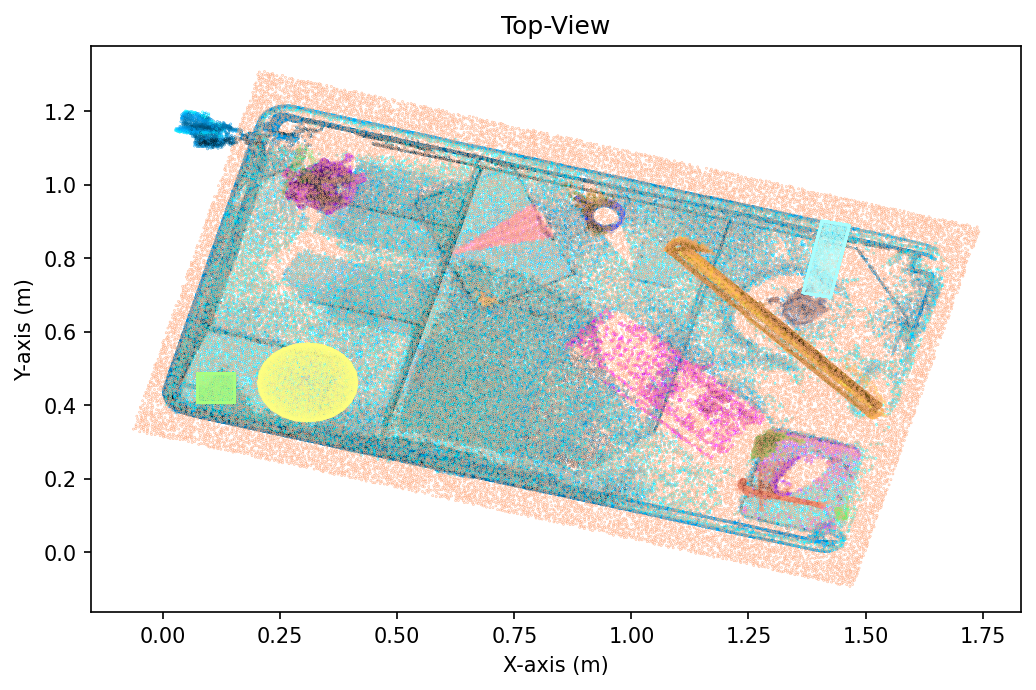

In [ ]:
#Vizualising on the two axes to select the filter
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(xyz[:,0], xyz[:,1], c=rgb/255, s=0.05)
plt.title("Top-View")
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.show()

In [ ]:
#for interactive plotting
import plotly.express as px
fig = px.scatter(x=xyz[:,0], y=xyz[:,1], color=xyz[:,2])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

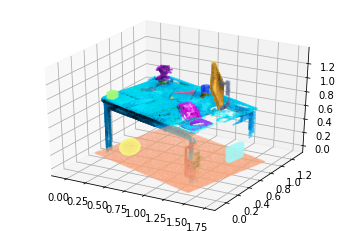

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = rgb/255, s=0.01)
plt.show()

# C - Automatic Parameter Set-up

In [ ]:
from sklearn.neighbors import KDTree
tree = KDTree(np.array(xyz), leaf_size=2)
nearest_dist, nearest_ind = tree.query(xyz, k=8)
mean_distance = np.mean(nearest_dist[:,1:])

# Step 4 - RANSAC Model Fitting

## A - Finding a Plane

In [ ]:
#!! Blank iteration
inliers=[]
idx_samples = random.sample(range(len(xyz)), 3)
pts = xyz[idx_samples]

vecA = pts[1] - pts[0]
vecB = pts[2] - pts[0]
normal = np.cross(vecA, vecB)
a,b,c = normal / np.linalg.norm(normal)
d=-np.sum(normal*pts[1])

## B. Point-to-Plane Distance: The threshold definition

In [ ]:
idx_inliers = []  # list of inliers ids
distance = (a * xyz[:,0] + b * xyz[:,1] + c * xyz[:,2] + d
            ) / np.sqrt(a ** 2 + b ** 2 + c ** 2)

threshold=0.05
idx_candidates = np.where(np.abs(distance) <= threshold)[0]
if len(idx_candidates) > len(inliers):
  equation = [a,b,c,d]
  inliers = idx_candidates


array([   356,    372,    423, ..., 154699, 154700, 154701])

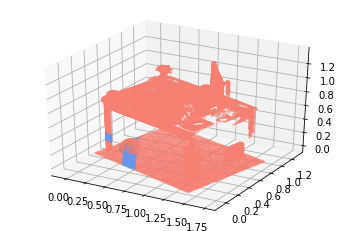

In [ ]:
xyz_in=xyz[inliers]

mask = np.ones(len(xyz), dtype=bool)
mask[inliers] = False

xyz_out=xyz[mask]

ax = plt.axes(projection='3d')
ax.scatter(xyz_in[:,0], xyz_in[:,1], xyz_in[:,2], c = 'cornflowerblue', s=0.02)
ax.scatter(xyz_out[:,0], xyz_out[:,1], xyz_out[:,2], c = 'salmon', s=0.02)
plt.show()

## C. Iteration and function definition

In [ ]:
def ransac_plane(xyz, threshold=0.05, iterations=1000):
  inliers=[]
  n_points=len(xyz)
  i=1

  while i<iterations:
    idx_samples = random.sample(range(n_points), 3)
    pts = xyz[idx_samples]

    vecA = pts[1] - pts[0]
    vecB = pts[2] - pts[0]
    normal = np.cross(vecA, vecB)
    a,b,c = normal / np.linalg.norm(normal)
    d=-np.sum(normal*pts[1])

    distance = (a * xyz[:,0] + b * xyz[:,1] + c * xyz[:,2] + d
                ) / np.sqrt(a ** 2 + b ** 2 + c ** 2) 

    idx_candidates = np.where(np.abs(distance) <= threshold)[0]

    if len(idx_candidates) > len(inliers):
      equation = [a,b,c,d]
      inliers = idx_candidates
    
    i+=1
  return equation, inliers

# Step 5. Point Cloud Binary Segmentation

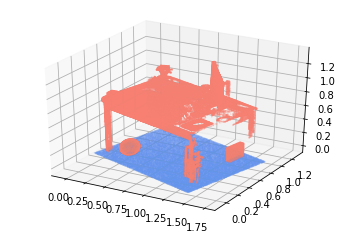

In [ ]:
eq,idx_inliers=ransac_plane(xyz,0.01)
inliers=xyz[idx_inliers]

mask = np.ones(len(xyz), dtype=bool)
mask[idx_inliers] = False

outliers=xyz[mask]

ax = plt.axes(projection='3d')
ax.scatter(inliers[:,0], inliers[:,1], inliers[:,2], c = 'cornflowerblue', s=0.02)
ax.scatter(outliers[:,0], outliers[:,1], outliers[:,2], c = 'salmon', s=0.02)
plt.show()

In [ ]:
result_folder="../DATA/RESULTS/"
np.savetxt(result_folder+dataset.split(".")[0]+"_inliers.xyz", inliers, fmt='%1.4f', delimiter=';')
np.savetxt(result_folder+dataset.split(".")[0]+"_outliers.xyz", outliers, fmt='%1.4f', delimiter=';')

# Conclusion

Bravo 🥳! You implemented a complete RANSAC Model Fitting Algorithm for Plane Detection and 3D Point Cloud Segmentation from scratch. On top, you can now automatically set RANSAC Parameters so that you have not a 99% automatic solution but a 100% Automation.